# Add allowed z region

In [1]:
import molsysmt as msm

In [2]:
import openmm as mm
from openmm import unit
from openmm import app
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

In [3]:
topology = app.Topology()
chain = topology.addChain('A')
residue = topology.addResidue('Ar', chain)
atom = topology.addAtom(name='Ar', element= app.element.argon, residue=residue)

In [4]:
system = mm.System()
system.addParticle(atom.element.mass) # masa del átomo de argón

0

In [5]:
msm.thirds.openmm.forces.add_allowed_z_region(system, z0='1.0 nm', width='0.5 nm',
                                              force_constant = '5000 kilojoules/(mol*angstroms**2)',
                                              pbc=True)

0

In [6]:
# Formalismo NVT
temperature = 300*unit.kelvin
pressure    = None

In [7]:
integration_timestep = 2.0*unit.femtoseconds
saving_interval = 1.00*unit.picoseconds
logging_interval = 100.00*unit.picoseconds
simulation_time = 1000.*unit.picoseconds

saving_steps = int(saving_interval/integration_timestep)
logging_steps = int(logging_interval/integration_timestep)
md_steps = int(simulation_time/integration_timestep)

In [8]:
friction   = 5.0/unit.picoseconds
integrator = mm.LangevinIntegrator(temperature, friction, integration_timestep)

In [9]:
platform = mm.Platform.getPlatformByName('OpenCL')

In [10]:
simulation = app.Simulation(topology, system, integrator, platform)

In [11]:
initial_positions  = [[0.0, 0.0, 1.0]] * unit.nanometers
simulation.context.setPositions(initial_positions)

In [12]:
Lbox = 2.0
v1 = [Lbox,0,0] * unit.nanometers
v2 = [0,Lbox,0] * unit.nanometers
v3 = [0,0,Lbox] * unit.nanometers
simulation.context.setPeriodicBoxVectors(v1, v2, v3)

In [13]:
reporter_tqdm = msm.thirds.openmm.reporters.TQDMReporter(logging_steps, md_steps, temperature=False)
simulation.reporters.append(reporter_tqdm)

In [14]:
reporter_trajectory_dict = msm.thirds.openmm.reporters.TrajectoryDictReporter(saving_steps, time=True, coordinates=True)
simulation.reporters.append(reporter_trajectory_dict)

In [15]:
simulation.step(md_steps)

  0%|          | 0/500000 [00:00<?, ?it/s]


Potential energy: 0.00 kJ/mol ± 0.00 kJ/mol

Execution time: 0 days, 0 hours, 0 minutes, and 21.12 seconds (4091.836 ns/day).



In [16]:
trajectory_dict = reporter_trajectory_dict.finalize()

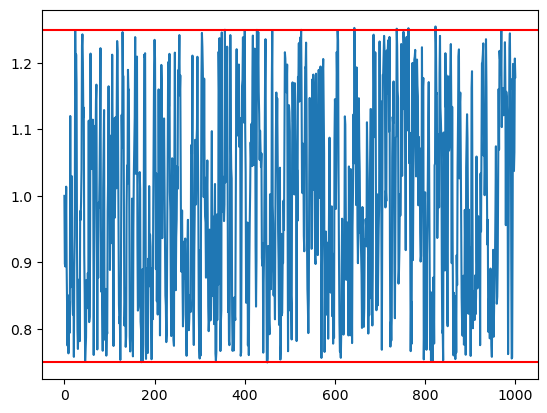

In [17]:
plt.plot(trajectory_dict['time'], trajectory_dict['coordinates'][:,0,2])
plt.axhline(y=1.25, color='red', linestyle='-')
plt.axhline(y=0.75, color='red', linestyle='-')
plt.show()